Natural Language Processing
Use the train.tsv file at
https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data
-Load the data, show the first five rows, check the data, and provide information on the
data.
-Show the distribution of review documents.
-Generate the document term matrix by using scikitlearn’s CountVectorizer. From
nltk.tokenizer import RegexpTokenizer. ‘Sentiment’ is the data. Train, test and split.
-Import the MultinomialNB module and create a MNB classifier object using the
MultinomialNB() function. Import scikit.learn metrics to compute the accuracy and fit
the model before computing the accuracy. What is the outcome?
-Use TfidfVectorizer-transformed data and split it into training and test datasets.
-Build the text classification model using TF-IDF. First, import the MultinomialNB
module and create the MNB classifier object using the MultinomialNB function. Fit the
model on the training set and perform the prediction. Is the accuracy better?

In [1]:
#pip install nltk

In [2]:
#import nltk

In [3]:
#nltk.download("book")

In [4]:
import pandas as pd
import seaborn as sns

In [5]:
train = pd.read_csv('train.tsv.zip', sep='\t')
train.head(5)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [10]:
train.describe()

,PhraseId,SentenceId,Sentiment
count,156060.000000,156060.000000,156060.000000
mean,78030.500000,4079.732744,2.063578
std,45050.785842,2502.764394,0.893832
min,1.000000,1.000000,0.000000
25%,39015.750000,1861.750000,2.000000
50%,78030.500000,4017.000000,2.000000
75%,117045.250000,6244.000000,3.000000
max,156060.000000,8544.000000,4.000000


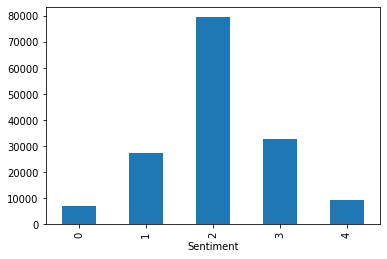

In [11]:
# Show the distribution of the review document
train1 = train[['Phrase','Sentiment']]
train1.groupby('Sentiment').Sentiment.count().plot.bar(ylim=0)

In [12]:
#Generate the document term matrix by using scikitlearn’s CountVectorizer. 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
train_C = vectorizer.fit_transform(train)
vectorizer.get_feature_names_out()

array(['phrase', 'phraseid', 'sentenceid', 'sentiment'], dtype=object)

In [13]:
print(train_C.toarray())

[[0 1 0 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 0 0 1]]


In [16]:
# From nltk.tokenizer import RegexpTokenizer. ‘Sentiment’ is the data. Train, test and split.
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True, stop_words='english', ngram_range=(1,1), tokenizer=token.tokenize)
X = cv.fit_transform(train['Phrase'])

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, train['Sentiment'], test_size=0.20, random_state=42)

In [18]:
#Import the MultinomialNB module and create a MNB classifier object using the
#MultinomialNB() function. Import scikit.learn metrics to compute the accuracy
#and fit the model before computing the accuracy. What is the outcome?
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(X_train, y_train) 
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: ", accuracy)

Accuracy Score:  0.6093169293861336


In [19]:
from sklearn.metrics import classification_report

print("Classification Report:", classification_report(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.46      0.28      0.35      1416
           1       0.50      0.42      0.46      5527
           2       0.68      0.79      0.73     15639
           3       0.52      0.50      0.51      6707
           4       0.49      0.30      0.37      1923

    accuracy                           0.61     31212
   macro avg       0.53      0.46      0.48     31212
weighted avg       0.59      0.61      0.60     31212



In [20]:
# Use TfidfVectorizer-transformed data and split it into training and test datasets.
# Build the text classification model using TF-IDF. First, import the MultinomialNB
# module and create the MNB classifier object using the MultinomialNB function. Fit the
# model on the training set and perform the prediction. 

from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
X = tf.fit_transform(train['Phrase'])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, train['Sentiment'], test_size=0.20, random_state=42)

In [22]:
clf = MultinomialNB().fit(X_train, y_train) 
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: ", accuracy)

Accuracy Score:  0.5843265410739459


In [23]:
print("Classification Report:", classification_report(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.66      0.04      0.07      1416
           1       0.52      0.25      0.34      5527
           2       0.60      0.90      0.72     15639
           3       0.54      0.39      0.45      6707
           4       0.66      0.06      0.11      1923

    accuracy                           0.58     31212
   macro avg       0.60      0.33      0.34     31212
weighted avg       0.58      0.58      0.53     31212



The accuracy score for the count vectorizer is better than the Tid Vectorizer. The accuracy for Count Vectorizer is 0.6093169293861336 while Tfid Vectorizer is  0.5843265410739459
